# MODEL

In [18]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import enum

import os
from PIL import Image
import cv2 #pip install opencv-python
import torchvision.transforms as transforms
import matplotlib.image as mpimg
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50
from torchvision import datasets, models, transforms
import torchvision

Reeee

In [15]:
import import_ipynb
# import proeprocess
%run preprocess.ipynb

In [25]:
simple_transformer = transforms.Compose([
        transforms.ToTensor()])

In [19]:
import torch.utils
import torch.utils.data

Split data into train set, validation set and test set with ratio 80/10/10

In [23]:
# import splitfolders
# splitfolders.ratio(PATHbirdsWithBackground, output="output",seed=42, ratio=(0.8,0.1,0.1) )

Copying files: 1044 files [00:01, 720.71 files/s]


In [27]:
PATH_TEST = "split_withbackground/test"

test_set = datasets.ImageFolder(PATH_TEST, simple_transformer)
test_set.classes

['blueTit',
 'chaffinch',
 'coalTit',
 'goldfinch',
 'greatTit',
 'robin',
 'starling']

In [28]:
PATH_TRAIN = "split_withbackground/train"
train_set = datasets.ImageFolder(PATH_TRAIN, simple_transformer)
train_set.classes

['blueTit',
 'chaffinch',
 'coalTit',
 'goldfinch',
 'greatTit',
 'robin',
 'starling']

In [29]:
PATH_VAL = "split_withbackground/val"
val_set = datasets.ImageFolder(PATH_VAL, simple_transformer)
val_set.classes

['blueTit',
 'chaffinch',
 'coalTit',
 'goldfinch',
 'greatTit',
 'robin',
 'starling']

In [36]:
dataloader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=4)

In [31]:
%matplotlib inline

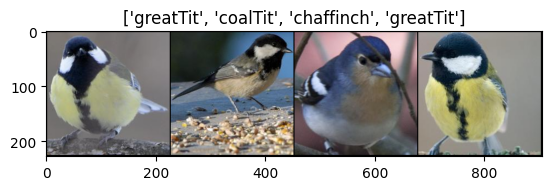

In [32]:
# taken from Lab 5
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

# Get a random batch of training data
inputs, classes = next(iter(dataloader))

# Make a grid of images
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[train_set.classes[x] for x in classes])

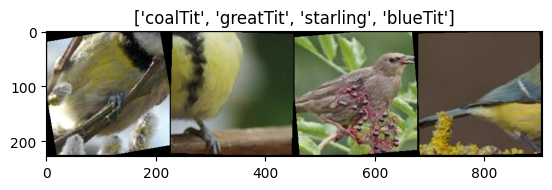

In [34]:
# From lab 5
# Data augmentation transformer
augmentation_transformer = transforms.Compose([
        transforms.RandomResizedCrop(224), # Crop the given PIL Image to random size and aspect ratio
        transforms.RandomHorizontalFlip(0.5), # Horizontally flip the given PIL Image randomly with a given probability.
        transforms.ColorJitter(brightness=0.1), # Randomly change the brightness, contrast and saturation of an image
        transforms.RandomRotation(degrees=10), # Rotate the image by angle.
        transforms.ToTensor()])

# Same as above, expect that we are using augmentation_transformer instead of simple_transformer
train_set = datasets.ImageFolder(PATH_TRAIN, augmentation_transformer)
dataloader_aug = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=4)
inputs, classes = next(iter(dataloader_aug))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[train_set.classes[x] for x in classes])

In [37]:
inputs, classes = next(iter(dataloader))

In [39]:
model = resnet50()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
#replace the fully connected layers such that it has 7 outputs instead of 1000
model.fc = torch.nn.Linear(model.fc.in_features, 7)
print(model.fc)

Linear(in_features=2048, out_features=7, bias=True)


In [43]:
dataset_size_train = len(train_set)
dataset_size_val = len(val_set)
print(dataset_size_train)
print(dataset_size_val)

835
104


In [44]:
import time
def train_model(model, num_epoch=25, batch_size=5):
    acc = []
    since = time.time()
    for epoch in range(num_epoch):
        print('Epoch {}/{}'.format(epoch+1, num_epoch))

        #training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in dataloader:
            # print("Input " + labels )
            # idk do something
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                criterion = torch.nn.CrossEntropyLoss()
                loss = criterion(outputs, labels)
                loss.backward()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_size_train
        epoch_acc = running_corrects.double() / dataset_size_train
        time_epoch = time.time() - since
        print('Epoch time {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print('Train Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
        #validation phase
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    return model
train_model(model=model, num_epoch=2) #took like 10 minutes

Epoch 0/1
Train Loss: 2.0558 Acc: 0.1425
Epoch 1/1
Train Loss: 2.0447 Acc: 0.1425


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 